In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/eda_and_dev_tools/main/datasets/online_shoppers_intention.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12131 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  11839 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12231 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12131.000000,12330.000000,11839.000000,12330.000000,12231.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.724502,31.731468,1190.534914,0.022191,0.043021,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,141.655684,44.475503,1908.447706,0.048488,0.048562,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.854167,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,597.625000,0.003112,0.025141,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1462.554562,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
df.describe(include='object')

,Month,VisitorType
count,12330,12330
unique,11,3
top,May,Returning_Visitor
freq,3348,10551


In [7]:
df.duplicated().sum()

np.int64(109)

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isnull().mean() * 100

Administrative             0.000000
Administrative_Duration    0.000000
Informational              0.000000
Informational_Duration     1.628345
ProductRelated             0.000000
ProductRelated_Duration    4.001309
BounceRates                0.000000
ExitRates                  0.810081
PageValues                 0.000000
SpecialDay                 0.000000
Month                      0.000000
OperatingSystems           0.000000
Browser                    0.000000
Region                     0.000000
TrafficType                0.000000
VisitorType                0.000000
Weekend                    0.000000
Revenue                    0.000000
dtype: float64

In [10]:
median_inf_dur = df['Informational_Duration'].median()
median_prod_dur = df['ProductRelated_Duration'].median()

df['Informational_Duration'].fillna(median_inf_dur, inplace=True)
df['ProductRelated_Duration'].fillna(median_prod_dur, inplace=True)
df.dropna(subset=['ExitRates'], inplace=True)

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\3514581402.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Informational_Duration'].fillna(median_inf_dur, inplace=True)
C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\3514581402.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [11]:
df.shape

(12122, 18)

array([[<Axes: title={'center': 'Administrative'}>,
        <Axes: title={'center': 'Administrative_Duration'}>,
        <Axes: title={'center': 'Informational'}>,
        <Axes: title={'center': 'Informational_Duration'}>],
       [<Axes: title={'center': 'ProductRelated'}>,
        <Axes: title={'center': 'ProductRelated_Duration'}>,
        <Axes: title={'center': 'BounceRates'}>,
        <Axes: title={'center': 'ExitRates'}>],
       [<Axes: title={'center': 'PageValues'}>,
        <Axes: title={'center': 'SpecialDay'}>,
        <Axes: title={'center': 'OperatingSystems'}>,
        <Axes: title={'center': 'Browser'}>],
       [<Axes: title={'center': 'Region'}>,
        <Axes: title={'center': 'TrafficType'}>, <Axes: >, <Axes: >]],
      dtype=object)

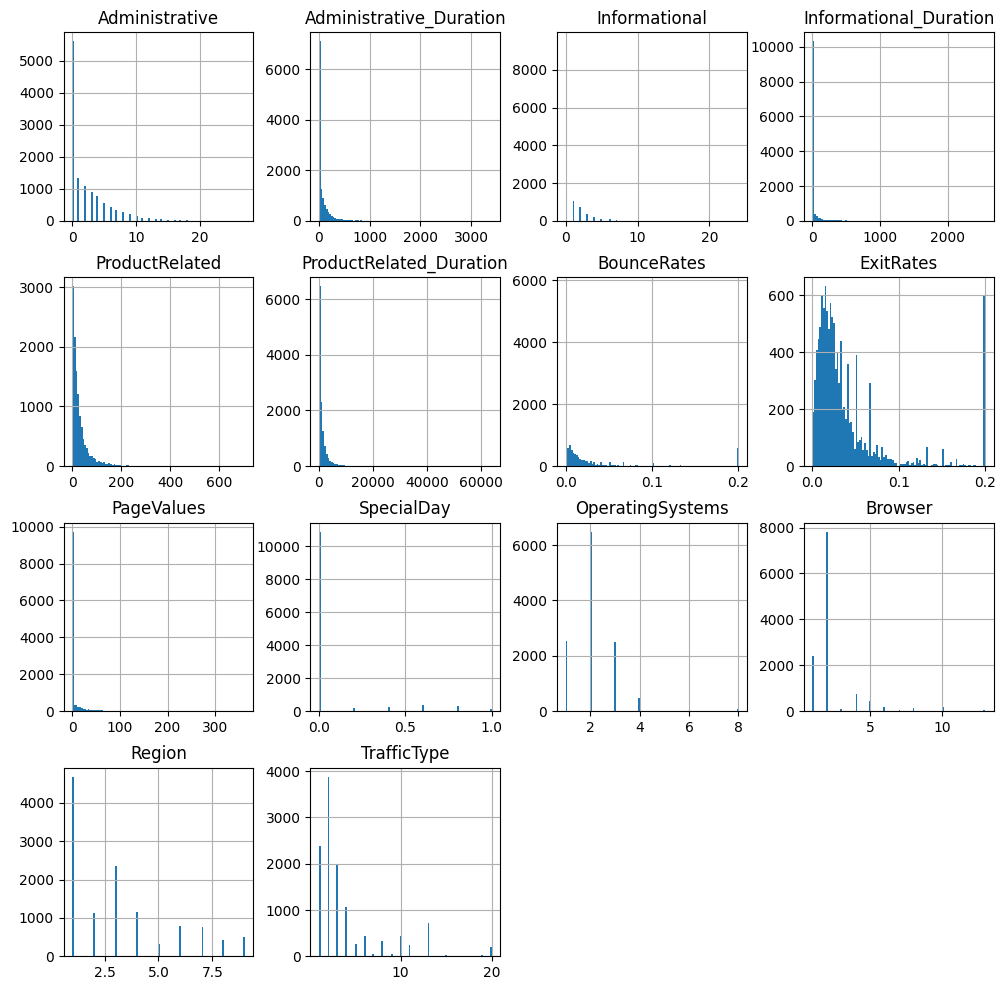

In [12]:
df.hist(bins=100, figsize=(12, 12))

In [13]:
df['Month'].unique()

array(['Feb', 'aug', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov',
       'Sep', 'Dec'], dtype=object)

In [14]:
df['Month'] = df['Month'].replace('aug', 'Aug')

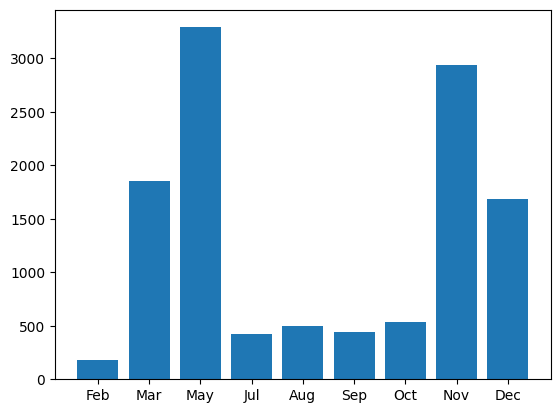

In [15]:
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun",
               "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

counts = df['Month'].value_counts().reindex(month_order).dropna()
plt.figure()
plt.bar(counts.index, counts.values)
plt.show()

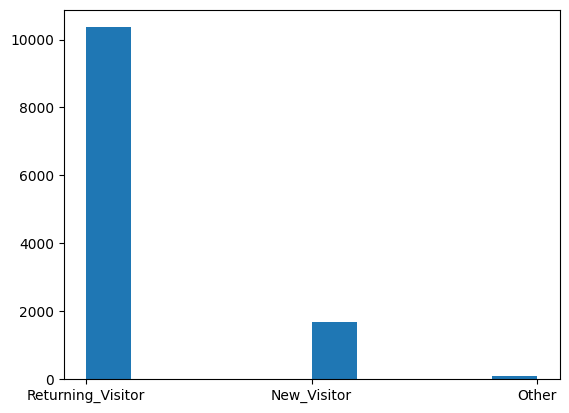

In [16]:
plt.figure()
plt.hist(df['VisitorType'])
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\1686634012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Administrative', y='Revenue', data=df, palette='summer')


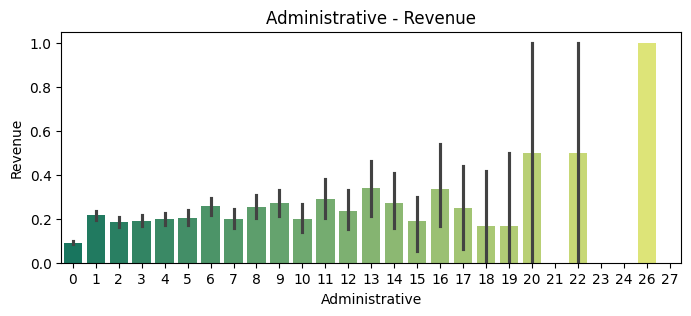

In [17]:
plt.figure(figsize=(8, 3))
sns.barplot(x='Administrative', y='Revenue', data=df, palette='summer')
plt.title('Administrative - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\2245932269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Administrative_Duration', x='Revenue', data=df, palette='summer')


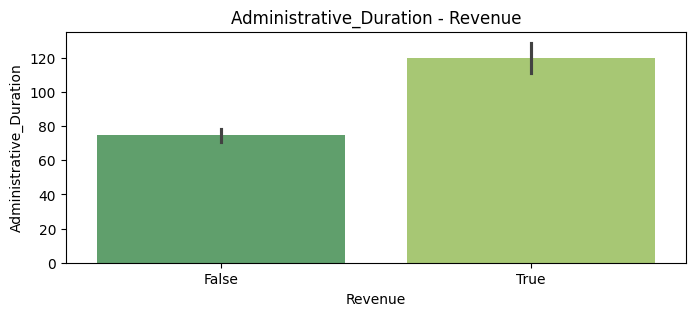

In [20]:
plt.figure(figsize=(8, 3))
sns.barplot(y='Administrative_Duration', x='Revenue', data=df, palette='summer')
plt.title('Administrative_Duration - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\1186841117.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Informational', y='Revenue', data=df, palette='summer')


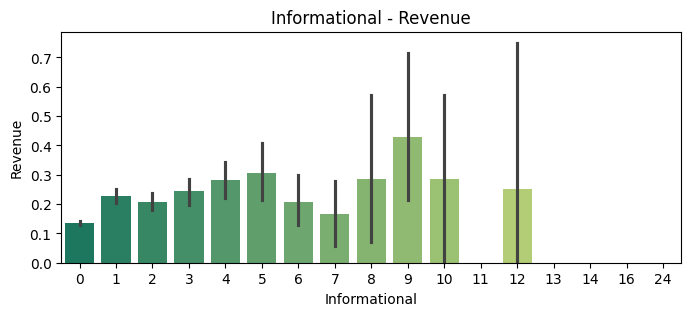

In [21]:
plt.figure(figsize=(8, 3))
sns.barplot(x='Informational', y='Revenue', data=df, palette='summer')
plt.title('Informational - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\2145446460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Informational_Duration', x='Revenue', data=df, palette='summer')


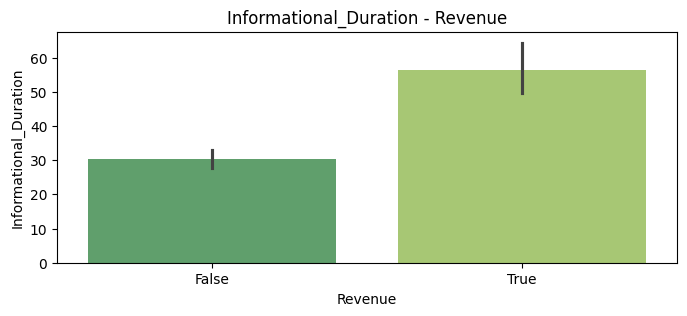

In [24]:
plt.figure(figsize=(8, 3))
sns.barplot(y='Informational_Duration', x='Revenue', data=df, palette='summer')
plt.title('Informational_Duration - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\4133177588.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='ProductRelated', x='Revenue', data=df, palette='summer')


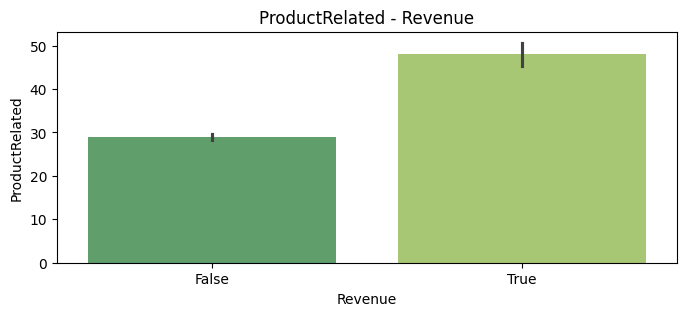

In [27]:
plt.figure(figsize=(8, 3))
sns.barplot(y='ProductRelated', x='Revenue', data=df, palette='summer')
plt.title('ProductRelated - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\237123509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='ProductRelated_Duration', x='Revenue', data=df, palette='summer')


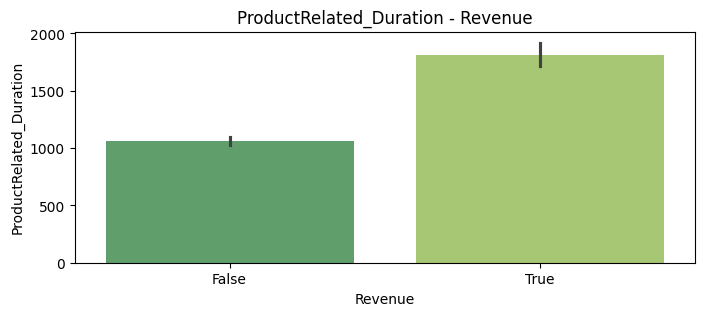

In [30]:
plt.figure(figsize=(8, 3))
sns.barplot(y='ProductRelated_Duration', x='Revenue', data=df, palette='summer')
plt.title('ProductRelated_Duration - Revenue')
plt.show()

Чем дольше пользователи сидят на Administrative_Duration, ProductRelated_Duration, Informational_Duration страницах, тем вероятнее купят товар. 

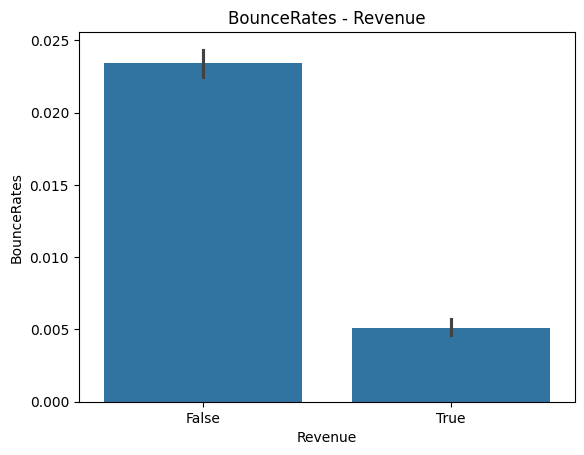

In [33]:
plt.figure()
sns.barplot(y=df['BounceRates'], x=df['Revenue'])
plt.title('BounceRates - Revenue')
plt.show()

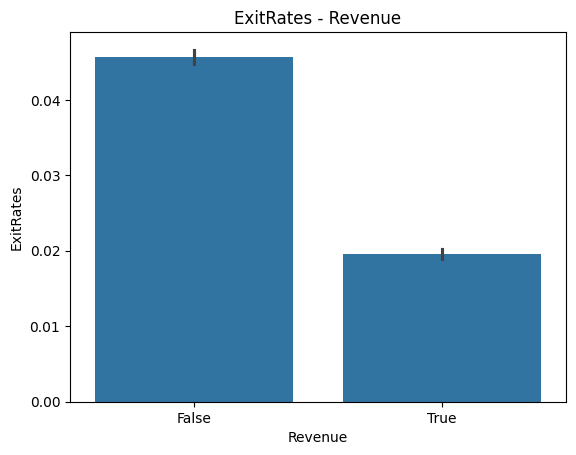

In [35]:
plt.figure()
sns.barplot(y=df['ExitRates'], x=df['Revenue'])
plt.title('ExitRates - Revenue')
plt.show()

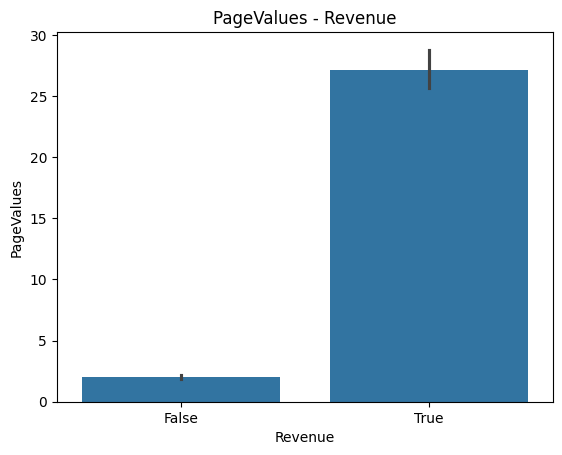

In [38]:
plt.figure()
sns.barplot(y=df['PageValues'], x=df['Revenue'])
plt.title('PageValues - Revenue')
plt.show()

Чем чаще пользователь выходит из страницы сразу после выхода, тем вероятнее, что он не купит товар.
Чем пользователь уходит со страницы(независимо от того, сколько было действий до), тем вероятнее, что он не купит товар.
Чем более ценная страница, тем вероятнее, что пользователь купит товар. 

In [ ]:
df['sp']

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\615960629.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SpecialDay', y='Revenue', data=df, palette='summer')


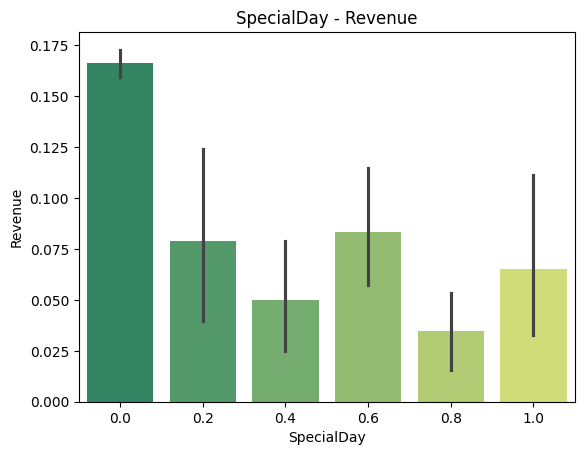

In [41]:
plt.figure()
sns.barplot(x='SpecialDay', y='Revenue', data=df, palette='summer')
plt.title('SpecialDay - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\2964843202.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['SpecialDay'].apply(lambda x: 0 if x==0 else 1), y=df['Revenue'], palette='summer')


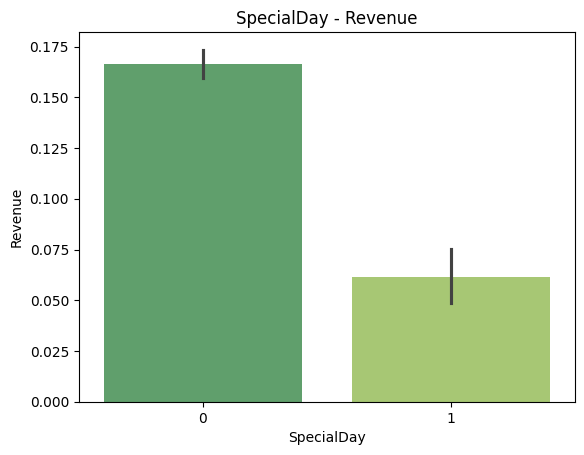

In [48]:
plt.figure()
sns.barplot(x=df['SpecialDay'].apply(lambda x: 0 if x==0 else 1), y=df['Revenue'], palette='summer')
plt.title('SpecialDay - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\155040590.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['Month'], y=df['Revenue'], palette='summer', order=counts.index)


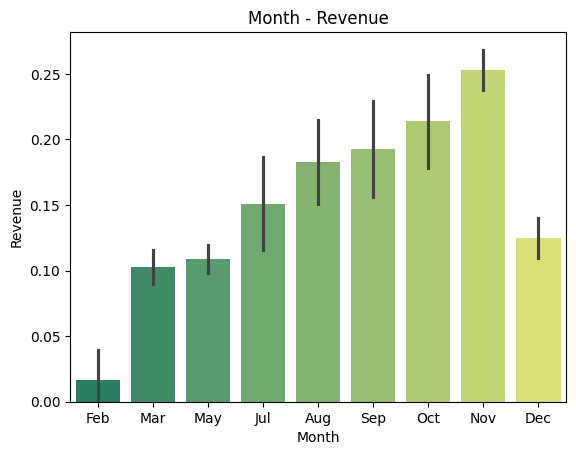

In [43]:
plt.figure()
sns.barplot(x=df['Month'], y=df['Revenue'], palette='summer', order=counts.index)
plt.title('Month - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\1073517859.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Weekend', x='Revenue', data=df, palette='summer')


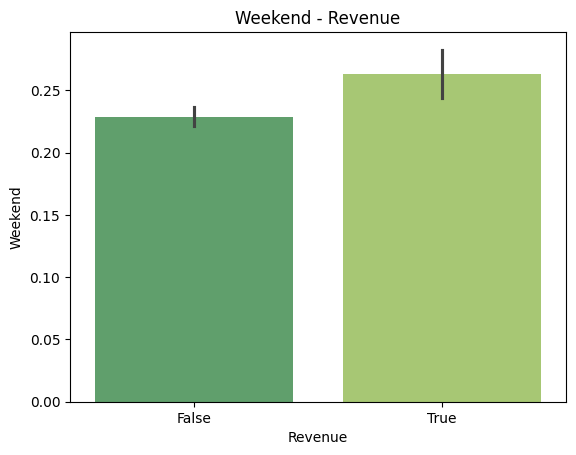

In [47]:
plt.figure()

sns.barplot(y='Weekend', x='Revenue', data=df, palette='summer')
plt.title('Weekend - Revenue')
plt.show()

Контекст покупок
1) Чаще покупают в обыкновенные дни, а не рядом с праздниками. Покупки близко к празднику имеют волнообразный тренд: сначала покупают с большей, потом с меньше.
2) С февраля по ноябрь рост продаж, в декабре резкое падение
3) В выходные покупают немного чаще, чем в будние дни.

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\1456885734.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TrafficType', y='Revenue', data=df, palette='summer')


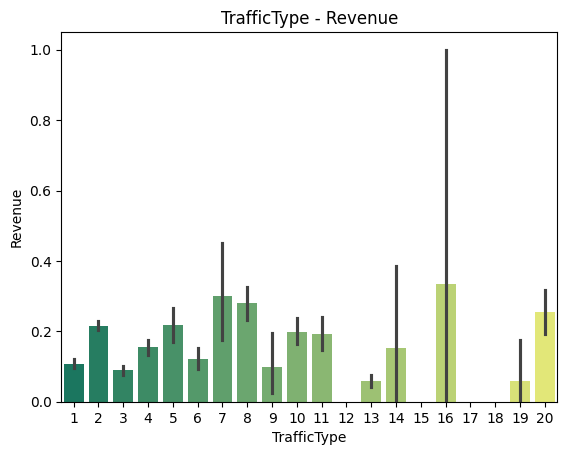

In [50]:
plt.figure()
sns.barplot(x='TrafficType', y='Revenue', data=df, palette='summer')
plt.title('TrafficType - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\1897463216.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Browser', y='Revenue', data=df, palette='summer')


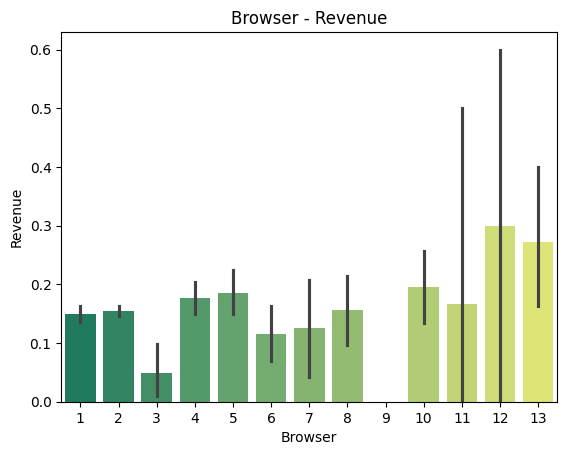

In [52]:
plt.figure()
sns.barplot(x='Browser', y='Revenue', data=df, palette='summer')
plt.title('Browser - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\363225514.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OperatingSystems', y='Revenue', data=df, palette='summer')


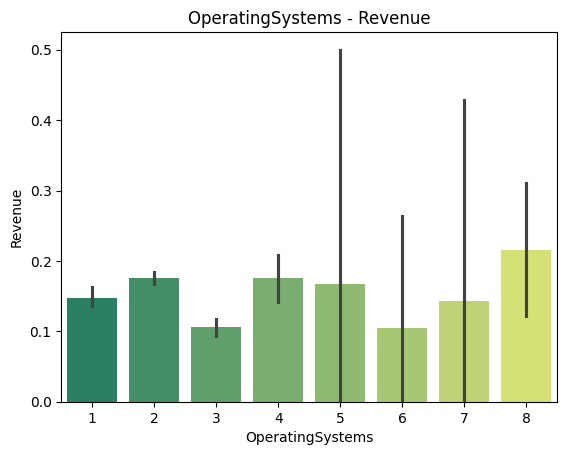

In [54]:
plt.figure()
sns.barplot(x='OperatingSystems', y='Revenue', data=df, palette='summer')
plt.title('OperatingSystems - Revenue')
plt.show()

C:\Users\ivans\AppData\Local\Temp\ipykernel_4772\1700850823.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='VisitorType', y='Revenue', data=df, palette='summer')


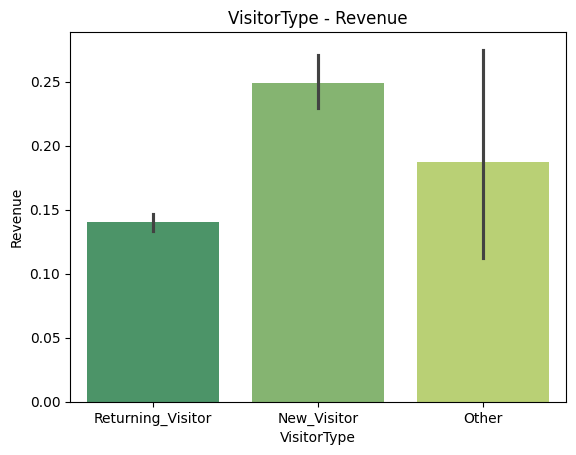

In [55]:
plt.figure()
sns.barplot(x='VisitorType', y='Revenue', data=df, palette='summer')
plt.title('VisitorType - Revenue')
plt.show()

Новые пользователи с большей вероятностью купят товар, чем вернувшиеся.

<Axes: >

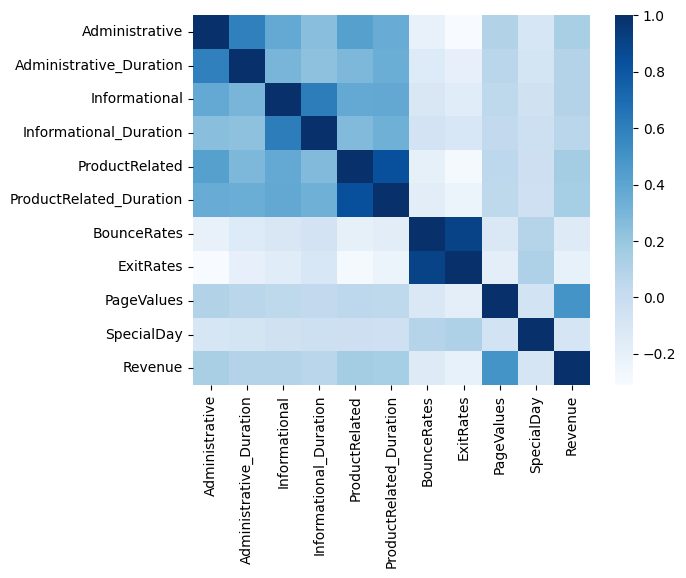

In [65]:
corr = df[['Administrative', 'Administrative_Duration',
	'Informational', 'Informational_Duration',
	'ProductRelated', 'ProductRelated_Duration',
	'BounceRates', 'ExitRates', 'PageValues',
	'SpecialDay', 'Revenue']].corr(numeric_only=True)

sns.heatmap(corr, cmap='Blues')

In [75]:
corr

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Revenue
Administrative,1.000000,0.600068,0.374035,0.251522,0.426555,0.359760,-0.213780,-0.311155,0.100373,-0.096910,0.135440
Administrative_Duration,0.600068,1.000000,0.301482,0.235875,0.287063,0.348165,-0.137251,-0.201722,0.068356,-0.075222,0.092170
Informational,0.374035,0.301482,1.000000,0.614095,0.372642,0.376332,-0.109888,-0.159899,0.049607,-0.048277,0.091189
Informational_Duration,0.251522,0.235875,0.614095,1.000000,0.276921,0.330258,-0.069668,-0.101866,0.031315,-0.031133,0.066992
ProductRelated,0.426555,0.287063,0.372642,0.276921,1.000000,0.836753,-0.194028,-0.286522,0.055392,-0.024930,0.155089
ProductRelated_Duration,0.359760,0.348165,0.376332,0.330258,0.836753,1.000000,-0.169995,-0.239287,0.049263,-0.036421,0.145109
BounceRates,-0.213780,-0.137251,-0.109888,-0.069668,-0.194028,-0.169995,1.000000,0.903785,-0.117019,0.084488,-0.145307
ExitRates,-0.311155,-0.201722,-0.159899,-0.101866,-0.286522,-0.239287,0.903785,1.000000,-0.174901,0.113227,-0.204008
PageValues,0.100373,0.068356,0.049607,0.031315,0.055392,0.049263,-0.117019,-0.174901,1.000000,-0.064629,0.495580
SpecialDay,-0.096910,-0.075222,-0.048277,-0.031133,-0.024930,-0.036421,0.084488,0.113227,-0.064629,1.000000,-0.082804


In [67]:
import association_metrics as am

df_cat = df.apply(lambda x: x.astype("category") if x.dtype == "object" else x)

cramersv = am.CramersV(df_cat)

cramersv.fit()

c:\Users\ivans\AppData\Local\Programs\Python\Python313\Lib\site-packages\association_metrics\categorical.py:100: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  self.matrix[x][y] = 1
c:\Users\ivans\AppData\Local\Programs\Python\Python313\Lib\s

,Month,VisitorType
Month,1.000000,0.135609
VisitorType,0.135609,1.000000


In [70]:
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [71]:
df['Region'].nunique()

9

In [ ]:
df = df.astype({'OperatingSystem': 'object',
				'Browser': 'object', 'Month': 'object',
				'Region': 'object', 'TrafficType': 'object',
				})

In [72]:
from scipy.stats import f_oneway

In [73]:
Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if c1 in ('OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month') and c2 not in  ('OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Month'):
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,Month,Administrative,Yes
1,Month,Administrative_Duration,Yes
2,Month,Informational,Yes
3,Month,Informational_Duration,Yes
4,Month,ProductRelated,Yes
...,...,...,...
72,Weekend,BounceRates,Yes
73,Weekend,ExitRates,Yes
74,Weekend,PageValues,No
75,Weekend,SpecialDay,No


Высоко скоррелированы Administrative и AdministrativeDuration, Informational и Informational_Duration, ProductRelated и ProductRelated_Duration, BonusRates и ExitRates. Revenue больше всего скоррелирована с PageValues.

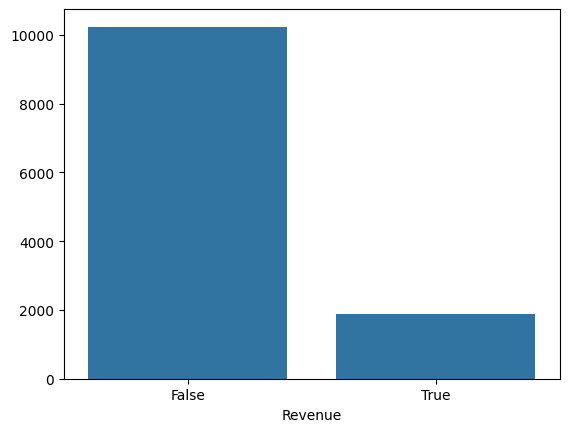

In [79]:
plt.figure()
sns.barplot(x=df['Revenue'].value_counts().index, y=df['Revenue'].value_counts().values)
plt.show()

In [80]:
df['Revenue'].value_counts()

Revenue
False    10236
True      1886
Name: count, dtype: int64

Распределение целевой переменной похоже на распределение Бернулли.
В данных присутсвует дисбаланс классов: False намного больше, чем True (в 5 раз!). Модель может плохо распознавать класс True, будет переобучение на нем.
Решаем задачу классификации.

In [84]:
df_big = df.copy()

for i in range(83):
  df_big = pd.concat([df_big, df])

df_big.to_csv("diamonds_big.csv", index=False)

In [85]:
import polars as pl

In [86]:
%%time

df_pl = pl.read_csv('diamonds_big.csv')

CPU times: total: 1.05 s
Wall time: 259 ms


In [87]:
%%time

df_pd = pd.read_csv('diamonds_big.csv')

CPU times: total: 1.33 s
Wall time: 1.38 s


In [88]:
%%time

df_pl.filter((pl.col('Month') == 'Aug') & (pl.col('Informational') >= 3) & (pl.col('Revenue') == 1))

CPU times: total: 0 ns
Wall time: 47.7 ms


Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
i64,f64,i64,f64,i64,f64,f64,f64,f64,f64,str,i64,i64,i64,i64,str,bool,bool
1,15.8,3,97.8,32,1213.65,0.005405,0.024324,1.273317,0.0,"""Aug""",2,2,3,2,"""Returning_Visitor""",false,true
9,399.8,5,923.9,115,7243.649316,0.003226,0.018929,3.58544,0.0,"""Aug""",2,2,8,4,"""Returning_Visitor""",false,true
10,515.613333,3,85.14,50,1558.62,0.003636,0.011879,12.125869,0.0,"""Aug""",3,2,4,4,"""Returning_Visitor""",true,true
0,0.0,5,194.4,8,197.9,0.036364,0.054545,0.0,0.0,"""Aug""",1,1,3,4,"""Returning_Visitor""",false,true
9,210.566667,3,61.6,10,124.866667,0.021053,0.030526,0.0,0.0,"""Aug""",1,1,3,2,"""Returning_Visitor""",false,true
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
0,0.0,5,194.4,8,197.9,0.036364,0.054545,0.0,0.0,"""Aug""",1,1,3,4,"""Returning_Visitor""",false,true
9,210.566667,3,61.6,10,124.866667,0.021053,0.030526,0.0,0.0,"""Aug""",1,1,3,2,"""Returning_Visitor""",false,true
0,0.0,4,112.6,93,2299.97,0.002778,0.0109375,16.959078,0.0,"""Aug""",2,2,1,4,"""Returning_Visitor""",false,true


In [91]:
%%time

df_pd[(df_pd['Month'] == 'Aug') & (df_pd['Informational'] >= 3) & (df_pd['Revenue'] == 1)]

CPU times: total: 46.9 ms
Wall time: 62.9 ms


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
5757,1,15.800000,3,97.80,32,1213.650000,0.005405,0.024324,1.273317,0.0,Aug,2,2,3,2,Returning_Visitor,False,True
5873,9,399.800000,5,923.90,115,7243.649316,0.003226,0.018929,3.585440,0.0,Aug,2,2,8,4,Returning_Visitor,False,True
6499,10,515.613333,3,85.14,50,1558.620000,0.003636,0.011879,12.125869,0.0,Aug,3,2,4,4,Returning_Visitor,True,True
6623,0,0.000000,5,194.40,8,197.900000,0.036364,0.054545,0.000000,0.0,Aug,1,1,3,4,Returning_Visitor,False,True
7665,9,210.566667,3,61.60,10,124.866667,0.021053,0.030526,0.000000,0.0,Aug,1,1,3,2,Returning_Visitor,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012749,0,0.000000,5,194.40,8,197.900000,0.036364,0.054545,0.000000,0.0,Aug,1,1,3,4,Returning_Visitor,False,True
1013791,9,210.566667,3,61.60,10,124.866667,0.021053,0.030526,0.000000,0.0,Aug,1,1,3,2,Returning_Visitor,False,True
1013949,0,0.000000,4,112.60,93,2299.970000,0.002778,0.010937,16.959078,0.0,Aug,2,2,1,4,Returning_Visitor,False,True
1014245,1,11.166667,3,63.50,28,2245.333333,0.002581,0.028495,36.200312,0.0,Aug,4,2,1,11,Returning_Visitor,False,True


In [94]:
%%time

df_pl.group_by('Month').agg([pl.mean('Administrative_Duration'), pl.median('ExitRates')])

CPU times: total: 594 ms
Wall time: 71.6 ms


Month,Administrative_Duration,ExitRates
str,f64,f64
"""Oct""",126.963136,0.020307
"""Sep""",108.577715,0.020887
"""May""",70.198278,0.028908
"""Dec""",79.586057,0.025
"""Aug""",101.452379,0.024141
"""Mar""",72.89404,0.025
"""June""",59.673447,0.0375
"""Jul""",79.897459,0.032203
"""Feb""",17.441152,0.043519


In [96]:
%%time

df_pd.groupby('Month').agg(AdminDurMean=('Administrative_Duration', 'mean'),
						   ExitRatesMedian=('ExitRates', 'median'))

CPU times: total: 109 ms
Wall time: 82.3 ms


,AdminDurMean,ExitRatesMedian
Month,,
Aug,101.452379,0.024141
Dec,79.586057,0.025000
Feb,17.441152,0.043519
Jul,79.897459,0.032203
June,59.673447,0.037500
Mar,72.894040,0.025000
May,70.198278,0.028908
Nov,91.691058,0.023077
Oct,126.963136,0.020307
